In [179]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [180]:
data_ruchardts = []
i=0
error = [0.01,0.0001]
while i<10:
    import_run = []
    j=0
    while j<2:
        collumn = np.genfromtxt("Data/Ruchardts.csv", delimiter=",", usecols=(2*i+j), skip_header=2)
        collumn = unumpy.uarray(collumn, std_devs = error[j])
        import_run.append(collumn)
        j+=1
    i+=1
    data_ruchardts.append(import_run)
    
#print(data_ruchardts)

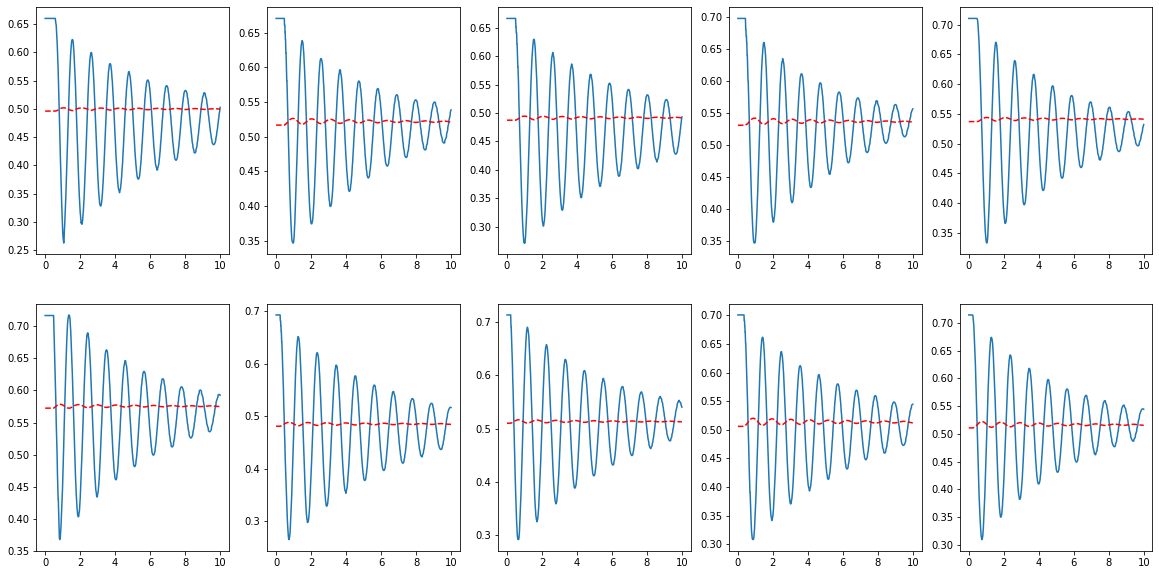

In [181]:
i=1
plt.figure(figsize=(20, 10))
for run in data_ruchardts:
    plt.subplot(2,5,i)
    plt.plot(unumpy.nominal_values(run[0]),unumpy.nominal_values(run[1]))
    i+=1
    def f(x,a,b,c,d,w):
        return c*np.exp(a*x)*np.cos(w*x+b)+d
    popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(run[0]), ydata=unumpy.nominal_values(run[1]),p0=[0.2,np.pi,0,0.5,2],bounds=([0,0,-1,0.45,1],[0.3,np.pi,1,0.6,3]))
    plt.plot(unumpy.nominal_values(run[0]), f(unumpy.nominal_values(run[1]),*popt), 'r--',label='Sinus fit')
plt.show()

In [182]:
data_Air = []
data_Ar = []
data_CO2 = []
data_N2 = []
data_Leak_Check = []

H = unc.ufloat(101.5,0.2)
error = 0.01

CD_list = ['Air', 'Ar', 'CO2', 'N2']

for gas in CD_list:
    collumn = np.genfromtxt("Data/CD_"+gas+'.csv', delimiter=",", usecols=(0), skip_header=2)
    collumn = unumpy.uarray(collumn, std_devs = error)
    globals()['data_'+gas].append(collumn)
    collumn = np.genfromtxt("Data/CD_"+gas+'.csv', delimiter=",", usecols=(2), skip_header=2)
    collumn = unumpy.uarray(collumn, std_devs = error)
    globals()['data_'+gas].append(collumn)
    #print(globals()['data_'+gas])

collumn = np.genfromtxt('Data/CD_Leak_Check.csv', delimiter=",", usecols=(1), skip_header=2)
collumn = unumpy.uarray(collumn, std_devs = error)
data_Leak_Check.append(collumn)
collumn = np.genfromtxt('Data/CD_Leak_Check.csv', delimiter=",", usecols=(4), skip_header=2)
collumn = unumpy.uarray(collumn, std_devs = error)
data_Leak_Check.append(collumn)

In [183]:
def CD_gamma(H,P0,P1):
    return unumpy.log(P0/H) / unumpy.log(P0/P1)

def Ruchardts_gamma(m,V,A,P,τ):
    return (4*np.pi^2*m*V) / (A^2 * P * τ)

Air
[ 1.2924157  -0.00477636]
[0.01767449 0.00142179]
------------------------------
Chi Square value:
3.2067502895894693
Expected value
9
Minimum Chi-Square for a good fit
0.5147186257614305
Maximum Chi-Square for a good fit
17.485281374238568
Doubtful minimum Chi-Square for a good fit
-3.727922061357855
Doubtful maximum Chi-Square for a good fit
21.727922061357855
------------------------------
Ar
[ 1.47974786 -0.00524976]
[0.03238637 0.00252472]
------------------------------
Chi Square value:
13.081562397137114
Expected value
8
Minimum Chi-Square for a good fit
0.0
Maximum Chi-Square for a good fit
16.0
Doubtful minimum Chi-Square for a good fit
-4.0
Doubtful maximum Chi-Square for a good fit
20.0
------------------------------
CO2
[ 1.246437   -0.00429141]
[0.00585468 0.00055003]
------------------------------
Chi Square value:
0.6137865950803254
Expected value
8
Minimum Chi-Square for a good fit
0.0
Maximum Chi-Square for a good fit
16.0
Doubtful minimum Chi-Square for a good fit

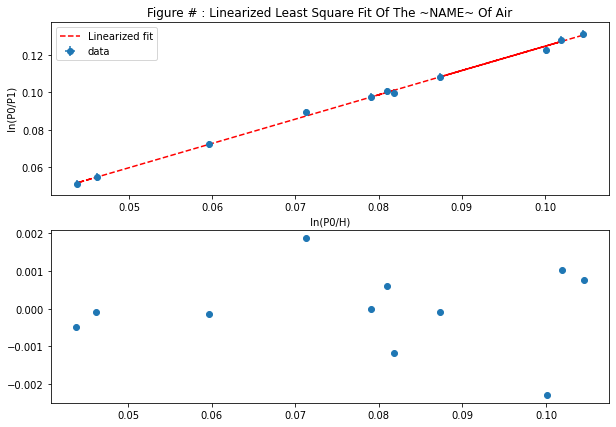

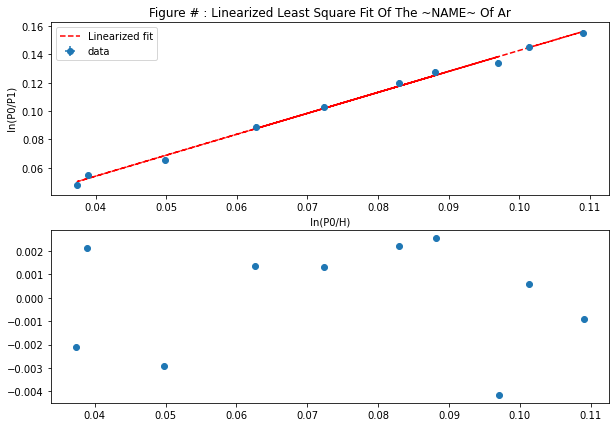

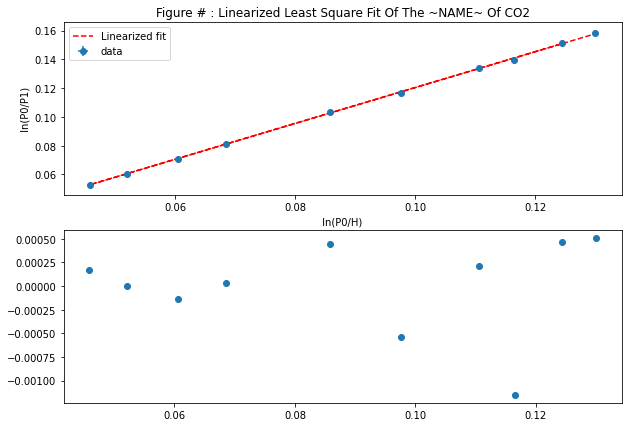

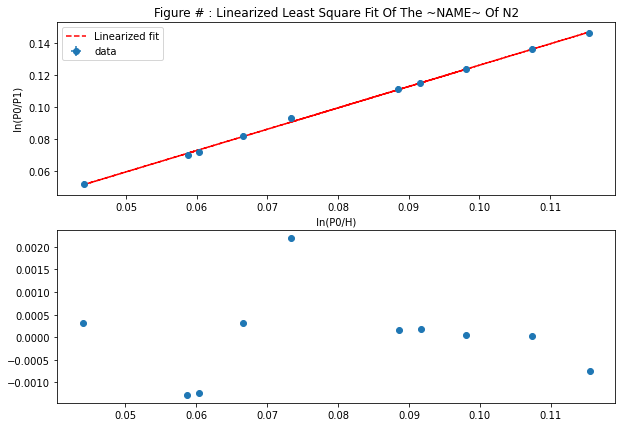

In [184]:
CD_list = ['Air', 'Ar', 'CO2', 'N2']

for gas in CD_list:
    print(gas)

    plt.figure(figsize=(10, 7))
    plt.subplot(2_1_1)
    y=unumpy.log(globals()['data_'+gas][1]/H)
    x=unumpy.log(globals()['data_'+gas][1]/globals()['data_'+gas][0])
    plt.errorbar(unumpy.nominal_values(x),unumpy.nominal_values(y),xerr=unumpy.std_devs(x),yerr=unumpy.std_devs(y),fmt='o',label='data')
    def f(x,a,b):
        return a*x + b
    popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(x), ydata=unumpy.nominal_values(y), sigma=(unumpy.std_devs(y)), p0=[sum(unumpy.nominal_values(x)*unumpy.nominal_values(y))/sum(unumpy.nominal_values(x) ** 2),0])
    print(popt)
    perr = np.sqrt(np.diag(pcov))
    print(perr)

    plt.plot(unumpy.nominal_values(x), f(unumpy.nominal_values(x),*popt), 'r--',label='Linearized fit')

    plt.legend()
    plt.title('''Figure # : Linearized Least Square Fit Of The ~NAME~ Of ''' + gas)
    plt.xlabel(' ln(P0/H) ')
    plt.ylabel(' ln(P0/P1) ')

    plt.subplot(2_1_2)

    plt.plot(unumpy.nominal_values(x), unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt)), 'o')

    plt.show

    print('-'*30)

    f_degree = len(x)-2
    print('Chi Square value:')
    print(sum( ( (unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt))) / unumpy.std_devs(y))**2 ) )
    print('Expected value')
    print(f_degree)
    print('Minimum Chi-Square for a good fit')
    print(f_degree - 2* (2*f_degree)**0.5)
    print('Maximum Chi-Square for a good fit')
    print(f_degree + 2* (2*f_degree)**0.5)

    print('Doubtful minimum Chi-Square for a good fit')
    print(f_degree - 3* (2*f_degree)**0.5)
    print('Doubtful maximum Chi-Square for a good fit')
    print(f_degree + 3* (2*f_degree)**0.5)
    print('-'*30)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

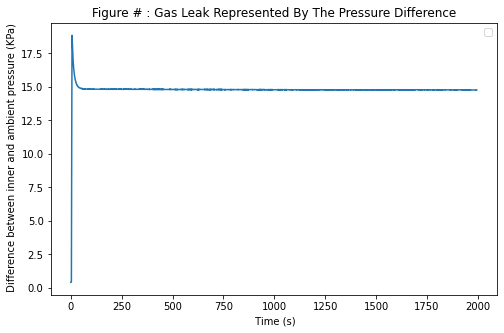

In [185]:
plt.figure(figsize=(8, 5))
plt.legend()
plt.title('''Figure # : Gas Leak Represented By The Pressure Difference''')
plt.xlabel(' Time (s)')
plt.ylabel(' Difference between inner and ambient pressure (KPa)')
plt.plot(unumpy.nominal_values(data_Leak_Check[0]),unumpy.nominal_values(data_Leak_Check[1]))
plt.show